In [2]:
# Import Libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
#Loading the dataset
car_data = pd.read_csv('autos.csv')
car_data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,golf,150000,Jul,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,fabia,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [6]:
# size of the dataset
car_data.shape

(313687, 27)

So, the database has 313,687 rows and 27 columns.

In [8]:
# Column names and their datatypes
car_data.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration    object
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
yearOfCreation          int64
yearCrawled             int64
monthOfCreation        object
monthCrawled           object
NoOfDaysOnline          int64
NoOfHrsOnline           int64
yearsOld                int64
monthsOld               int64
dtype: object

the datatype of dateCrawled, dateCreated, lastSeen can be converted from object to date as they are date fields.

In [11]:
car_data.dateCrawled = pd.to_datetime(car_data.dateCrawled)
car_data.dateCreated = pd.to_datetime(car_data.dateCreated)
car_data.lastSeen = pd.to_datetime(car_data.lastSeen)

In [13]:
# Setting dateCRawled column as Dataframe index
car_data.set_index('dateCrawled', inplace=True)

# Sort the DataFrame by the index
car_data.sort_index(inplace=True)

In [14]:
print('Data crawling start date: ', car_data.index[0])
print('Data crawling end date: ', car_data.index[-1])
print("Total days: ", car_data.index[-1]- car_data.index[0])

Data crawling start date:  2016-03-05 14:06:22
Data crawling end date:  2016-04-07 14:36:58
Total days:  33 days 00:30:36


# **Data Cleaning**
**Check for null, missing and duplicates in the data**


In [16]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313687 entries, 2016-03-05 14:06:22 to 2016-04-07 14:36:58
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 313687 non-null  object        
 1   seller               313687 non-null  object        
 2   offerType            313687 non-null  object        
 3   price                313687 non-null  int64         
 4   abtest               313687 non-null  object        
 5   vehicleType          313687 non-null  object        
 6   yearOfRegistration   313687 non-null  int64         
 7   gearbox              313687 non-null  object        
 8   powerPS              313687 non-null  int64         
 9   model                313687 non-null  object        
 10  kilometer            313687 non-null  int64         
 11  monthOfRegistration  313687 non-null  object        
 12  fuelType             313498 non-null  

The only column containing null values is fuelType as the count of non null values(313498) is less than that of total rows(313687).

In [18]:
# Checking missing values
car_data.isnull().any()

name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType            False
yearOfRegistration     False
gearbox                False
powerPS                False
model                  False
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage      False
dateCreated            False
postalCode             False
lastSeen               False
yearOfCreation         False
yearCrawled            False
monthOfCreation        False
monthCrawled           False
NoOfDaysOnline         False
NoOfHrsOnline          False
yearsOld               False
monthsOld              False
dtype: bool

In [20]:
car_data.fuelType.isnull().sum()

189

**Removing the rows with missing fuelType values.**

In [21]:
car_data = car_data[car_data.fuelType.notnull()]

**Check if duplicate rows are present in the data**

In [24]:
car_data.duplicated().sum()

25

In [28]:
# Removing the 25 duplicate rows from data
car_data.drop_duplicates(inplace=True)

# **Data Analysis**

**Count the total no of vehicles of each brand**

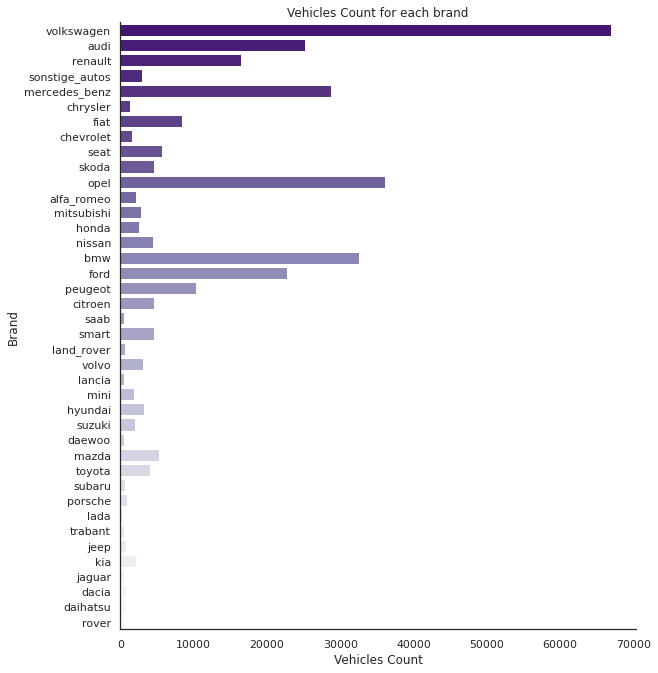

In [36]:
plot = sns.catplot(data=car_data, y="brand", kind="count", palette="Purples_r", size=9)
plot.ax.xaxis.set_label_text("Vehicles Count")
plot.ax.yaxis.set_label_text("Brand")
plot.ax.set_title("Vehicles Count for each brand")
plt.show()

the above plot shows that Volkswagen has the highest number of vehicles for selling

**Count the total no of vehicles of each vehicle type**

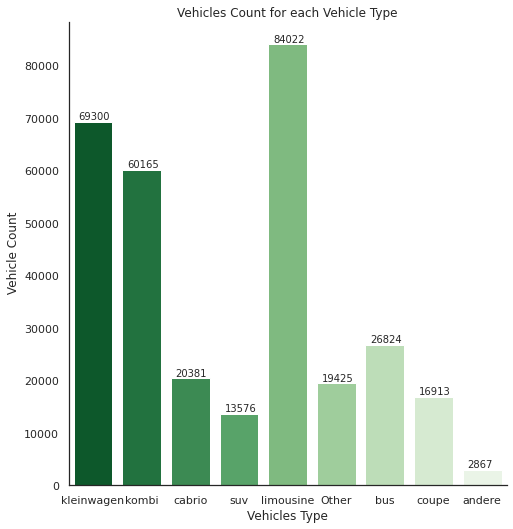

In [54]:

plot = sns.catplot(data=car_data, x='vehicleType', kind="count", palette="Greens_r", size=7)
plot.ax.set_title("Vehicles Count for each Vehicle Type")
plot.set_xlabels("Vehicles Type")
plot.set_ylabels(" Vehicle Count")
for p in plot.ax.patches:
    plot.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))
plt.show()

Limousine has the highest no of cars for selling

**Find the variation in Price range for each Vehicle Type**

In [55]:
car_data.vehicleType.unique()

array(['kleinwagen', 'kombi', 'cabrio', 'suv', 'limousine', 'Other',
       'bus', 'coupe', 'andere'], dtype=object)

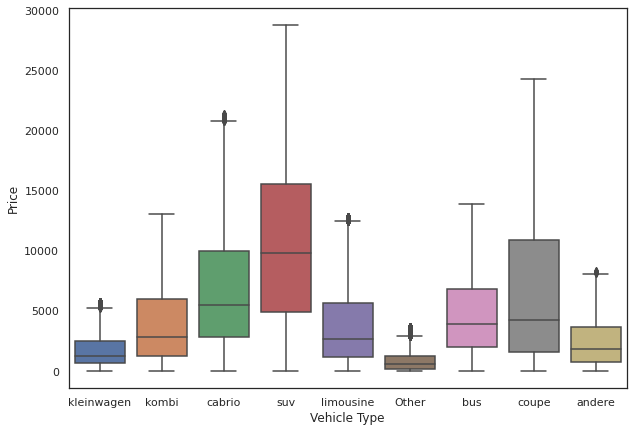

In [57]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='vehicleType', y='price', data=car_data)
ax.set_xlabel("Vehicle Type")
ax.set_ylabel("Price")
plt.show()

**Average Price based on Vehicle Type and Gearbox Type**

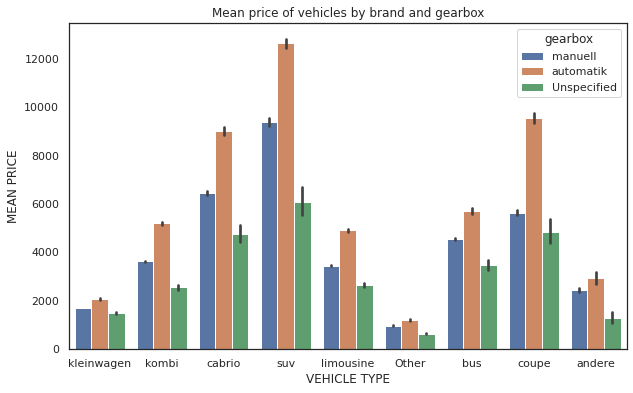

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='vehicleType', y='price', hue='gearbox', data=car_data)
ax.set_title("Mean price of vehicles by brand and gearbox")
ax.set_xlabel("VEHICLE TYPE")
ax.set_ylabel("MEAN PRICE")
plt.show()

**Average Power based on Vehicle Type and Gearbox Type**

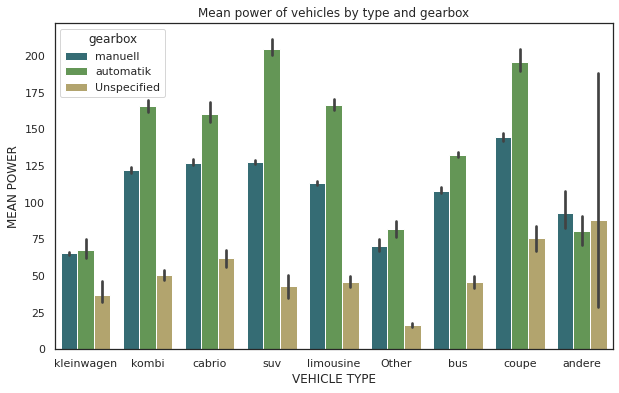

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='vehicleType', y='powerPS', hue='gearbox', palette='gist_earth', data=car_data)
ax.set_title("Mean power of vehicles by type and gearbox")
ax.set_xlabel("VEHICLE TYPE")
ax.set_ylabel("MEAN POWER")
plt.show()
